# Demonstration

This notebook demostrates possible usages of the code and displays some interesting phenomenology of the memory.

In [1]:
%pylab inline

import gwmemory

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
mpl.rcParams["font.size"] = 20
mpl.rcParams["text.usetex"] = True
mpl.rcParams["grid.alpha"] = 0

## Importance of Higher-Order Modes

This figure demonstrates the importance of including higher-order oscillatory modes in the evaluation of the memory.

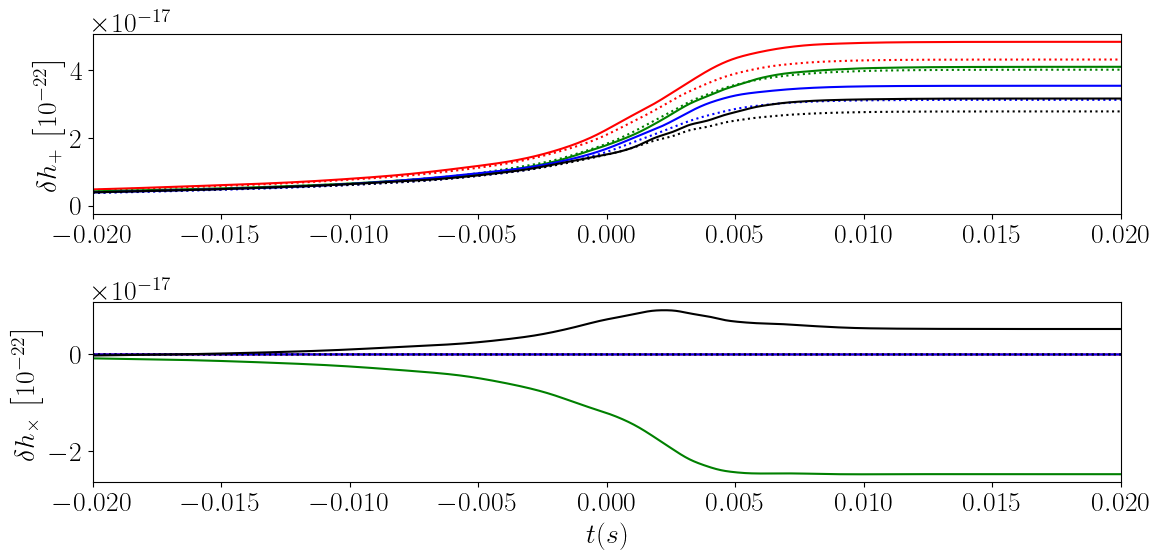

In [3]:
fig = plt.figure(figsize=(12, 6))

qs = [1., 2.]
S1s = [[0., 0., 0.], [0.8, 0., 0.]]
S2s = [[0., 0., 0.], [0., 0.8, 0.]]

colours = ['r', 'b', 'g', 'k']

times = np.linspace(-0.08, 0.02, 10001)

labels = ['Equal-mass, non-spinning']

ax = [fig.add_subplot(2, 1, 1), fig.add_subplot(2, 1, 2)]

parameters = dict(
    total_mass=60, distance=400, model='NRSur7dq2', inc=np.pi/2, phase=0, times=times
)

for ii, q in enumerate(qs):
    parameters["q"] = q
    for jj, (S1, S2) in  enumerate(zip(S1s, S2s)):
        colour = colours[ii + jj * 2]
        
        parameters["spin_1"] = S1
        parameters["spin_2"] = S2
    
        h_mem, times = gwmemory.time_domain_memory(**parameters)

        ax[0].plot(times, h_mem['plus'] * 1e22, linestyle='-', color=colour)
        ax[1].plot(times, h_mem['cross'] * 1e22, linestyle='-', color=colour)

        h_mem, times = gwmemory.time_domain_memory(
            **parameters, Lmax=2, modes=[(2, 2), (2, -2)]
        )

        ax[0].plot(times, h_mem['plus'] * 1e22, linestyle=':', color=colour)
        ax[1].plot(times, h_mem['cross'] * 1e22, linestyle=':', color=colour)

plt.xlabel('$t (s)$')
ax[0].set_ylabel('$\delta h_{+} \, \left[10^{-22}\\right]$')
ax[1].set_ylabel('$\delta h_{\\times} \, \left[10^{-22}\\right]$')

ax[0].set_xlim(-0.02, 0.02)
ax[1].set_xlim(-0.02, 0.02)

plt.tight_layout()
plt.show()
plt.close()

## Oscillatory Mode Dependance

This figure demonstrates the impact of the different oscillatory modes on the memory.

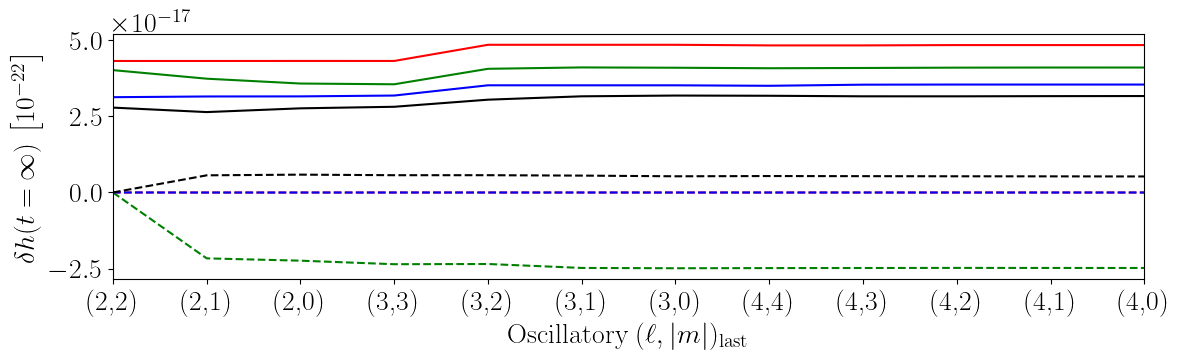

In [4]:
qs = [1., 2.]
S1s = [[0., 0., 0.], [0.8, 0., 0.]]
S2s = [[0., 0., 0.], [0., 0.8, 0.]]

colours = ['r', 'b', 'g', 'k']

mems_plus = {}
mems_cross = {}

times = np.linspace(-0.08, 0.02, 10001)

parameters = dict(
    total_mass=60, distance=400, times=times
)

for ii, q in enumerate(qs):
    parameters["q"] = q
    for jj, (S1, S2) in  enumerate(zip(S1s, S2s)):
        parameters["spin_1"] = S1
        parameters["spin_2"] = S2

        surr = gwmemory.waveforms.Surrogate(**parameters)

        hmem = {}

        surr.modes = []
        for l in range(2,5):
            for m in np.flipud(range(0,l+1)):
                surr.modes += list(set([(l,m),(l,-m)]))
                surr.h_lm, surr.times = surr.time_domain_oscillatory(modes=surr.modes, times=times)
                hmem['{}{}'.format(l,m)], times = surr.time_domain_memory(inc=np.pi/2, phase=0)

        max_h_mem_plus = []
        max_h_mem_cross = []
        keys = []
        for l in range(2,5):
            for m in np.flipud(range(0,l+1)):
                keys.append('{}{}'.format(l,m))
                max_h_mem_plus.append(hmem['{}{}'.format(l,m)]['plus'][-1])
                max_h_mem_cross.append(hmem['{}{}'.format(l,m)]['cross'][-1])

        mems_plus['{}{}{}'.format(q, S1, S2)] = np.array(max_h_mem_plus)
        mems_cross['{}{}{}'.format(q, S1, S2)] = np.array(max_h_mem_cross)

colours = ['r', 'b', 'g', 'k']

spin_keys = ['{}{}'.format(S1,S2) for S1, S2 in zip(S1s, S2s)]

fig=figure(figsize=(12, 4))

for ii, q in enumerate(qs):
    for jj, (S1, S2) in  enumerate(zip(S1s, S2s)):

        key = '{}{}{}'.format(q, S1, S2)
        max_h_mems_plus = mems_plus[key]
        max_h_mems_cross = mems_cross[key]

        plt.plot(
            range(len(max_h_mems_plus)), max_h_mems_plus * 1e22, color=colours[ii + jj * 2], linestyle='-',
            label='$q={}$, $S_1={}$, $S_2={}$'.format(q, S1, S2)
        )
        plt.plot(range(len(max_h_mems_cross)), max_h_mems_cross * 1e22, color=colours[ii + jj * 2], linestyle='--')

xticks(range(len(max_h_mems_plus)))
keys = ['({},{})'.format(ell, delta_m) for ell, delta_m in keys]
ax = plt.gca()
ax.set_xticklabels(keys)
xlim(0, len(max_h_mems_plus)-1)
ax.grid(axis='both')

plt.xlabel('Oscillatory $(\ell, |m|)_{\mathrm{last}}$')
plt.ylabel('$\delta h(t=\infty) \, \left[10^{-22}\\right]$')
    
plt.tight_layout()
plt.show()
plt.close()

## Memory Mode Dependance

This figure shows the spin-weighted spherical harmonic decomposition of the memory waveform.

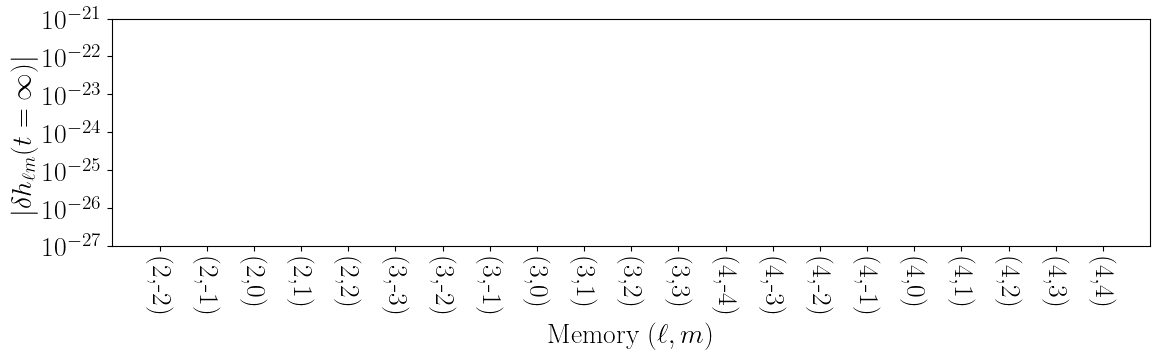

In [5]:
fig = plt.figure(figsize=(12, 4))

qs = [1., 2.]
S1s = [[0., 0., 0.], [0.8, 0., 0.]]
S2s = [[0., 0., 0.], [0., 0.8, 0.]]

colours = ['r', 'b', 'g', 'k']

times = np.linspace(-0.08, 0.02, 10001)

parameters = dict(
    total_mass=60, distance=400, times=times, model="NRSur7dq2"
)

for ii, q in enumerate(qs):
    parameters["q"] = q
    for jj, (S1, S2) in  enumerate(zip(S1s, S2s)):
        parameters["spin_1"] = S1
        parameters["spin_2"] = S2
    
        h_mem, times = gwmemory.time_domain_memory(**parameters)

        colour = colours[ii + jj * 2]

        for ell, delta_m in h_mem:
            if ell <= 4:
                if ell == 2 and delta_m == 0:
                    plt.scatter(
                        ell**2 + delta_m + ell, abs(h_mem[(ell, delta_m)][-1]), marker='x',
                        s=200, color=colour, label='$q={}$, $S_1={}$, $S_2={}$'.format(q, S1, S2)
                    )
                else:
                    plt.scatter(
                        ell**2 + delta_m + ell, abs(h_mem[(ell, delta_m)][-1]), marker='x',
                        s=200, color=colour
                    )
                plt.plot(
                    [ell**2 + delta_m + ell, ell**2 + delta_m + ell],
                    [0, abs(h_mem[(ell, delta_m)][-1])],
                    color=colour, alpha=0.2
                )

xlim(3, 5**2)
xticks(range(4, 5**2, 1), rotation=270)
keys = ['({},{})'.format(ell, delta_m) for ell in range(2, 5) for delta_m in range(-ell, ell + 1)]
ax = plt.gca()
ax.set_xticklabels(keys)
plt.xlabel('Memory $(\ell, m)$')

plt.ylim(1e-27, 1e-21)
plt.yscale('log')
plt.ylabel('$|\delta h_{\ell m}(t=\infty)|$')

ax = plt.gca()
ax.set_yticks(np.logspace(-27, -21, 7))
ax.grid(axis='y')
    
plt.tight_layout()
plt.show()
plt.close()

## Orientation Dependance

Next we plot the orientation dependance of the + and x polarized memory as a function of source inclination (zenith) and orbital phase (azimuth).

*NOTE: this plot requires [`Basemap`](https://github.com/matplotlib/basemap) for the projection.*

Install with
```console
$ pip install https://github.com/matplotlib/basemap/archive/master.zip
```

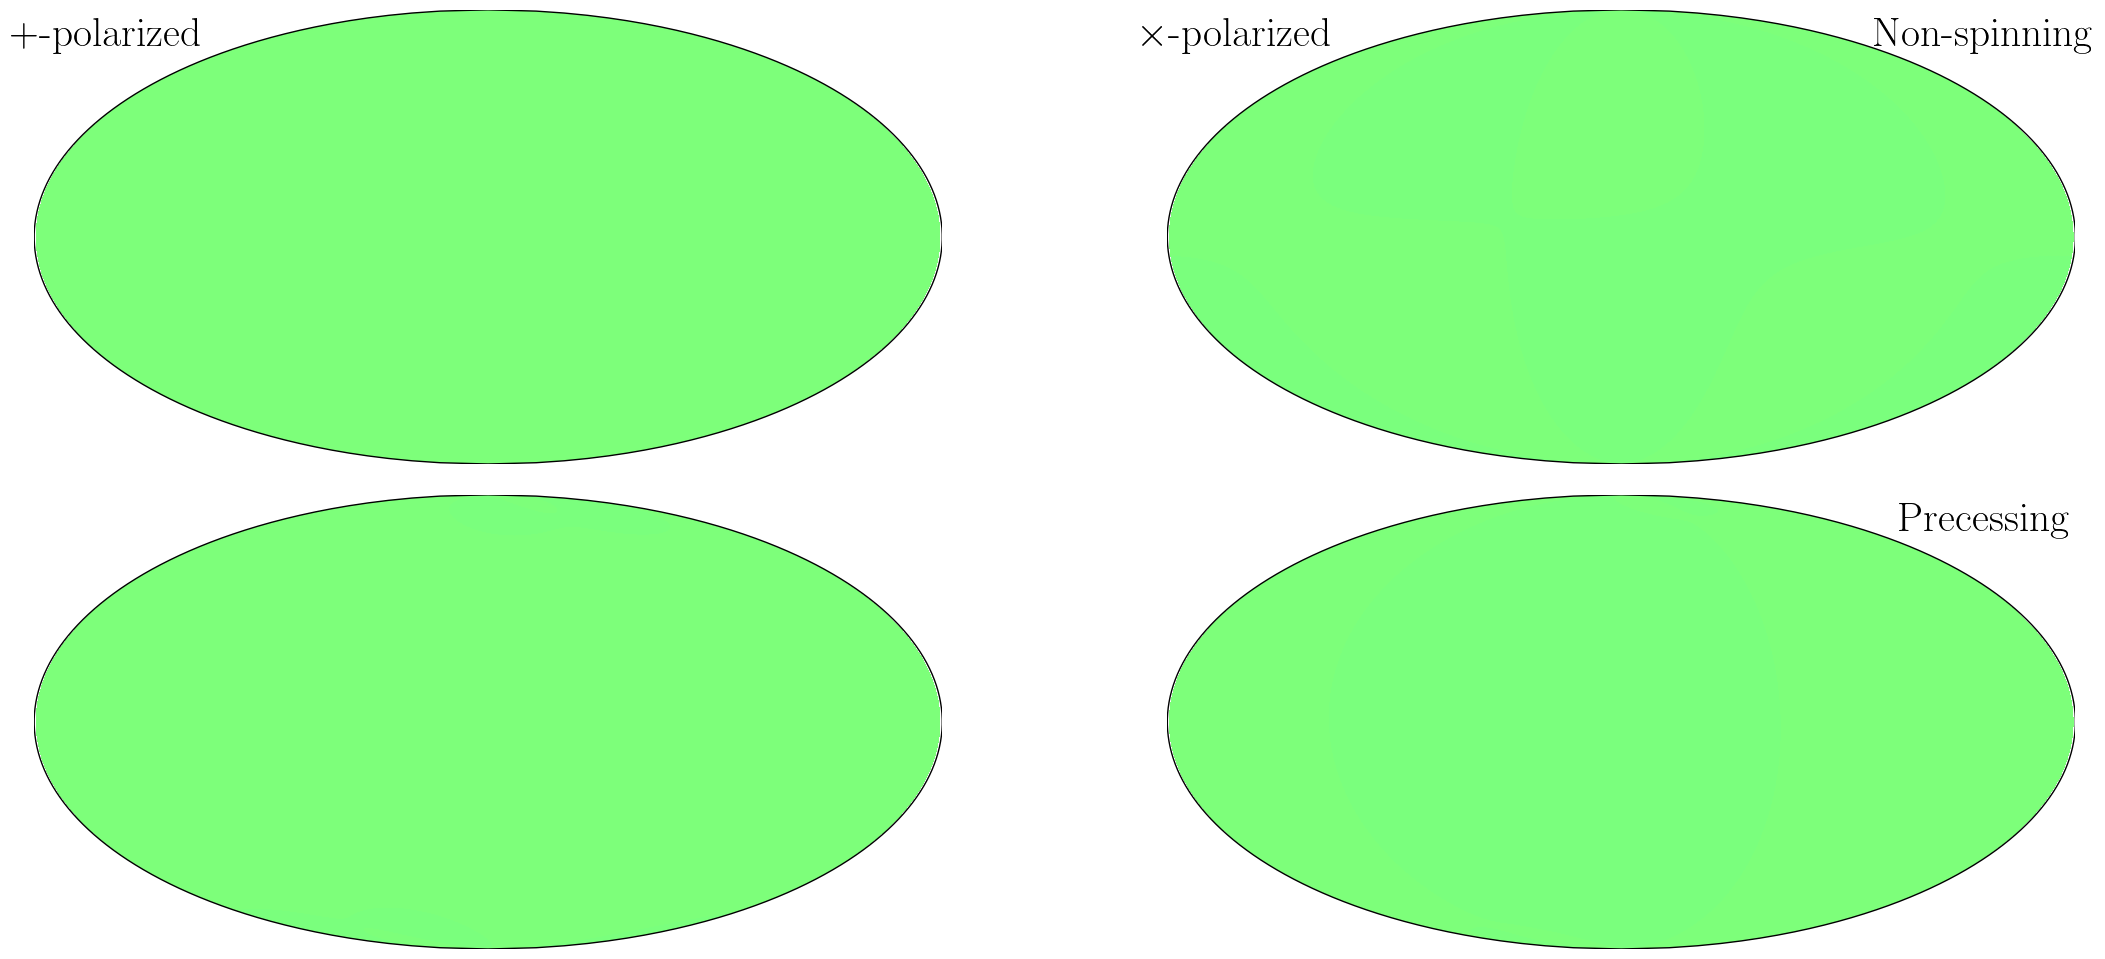

In [6]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(24, 10))

qs = [1.]
S1s = [[0., 0., 0.], [0.8, 0., 0.]]
S2s = [[0., 0., 0.], [0., 0.8, 0.]]

labels = ['Non-spinning', 'Precessing']

parameters = dict(
    total_mass=60, distance=400, times=times, model="NRSur7dq2"
)

for ii, q in enumerate(qs):
    parameters["q"] = q
    for jj, (S1, S2) in  enumerate(zip(S1s, S2s)):
        parameters["spin_1"] = S1
        parameters["spin_2"] = S2
    
        h_mem_lm, times = gwmemory.time_domain_memory(**parameters)

        inc_array = np.linspace(0, np.pi, 200) - np.pi/2
        pol_array = np.linspace(0, 2 * np.pi, 200) - np.pi
        pols, incs = np.meshgrid(pol_array, inc_array)
        pols_deg = pols * 180 / np.pi
        incs_deg = incs * 180 / np.pi
        y_lm = {(ell, m): gwmemory.harmonics.sYlm(-2, ell, m, incs + np.pi/2, pols)
                for ell, m in h_mem_lm.keys()}

        orientation_map = np.sum([y_lm[key] * h_mem_lm[key][-1] for key in y_lm], axis=0)
        
        ax = subplot(2, 2, ii * 4 + jj * 2 + 1)
        m = Basemap(projection='moll',lon_0=-180,resolution='c')
        m.contourf(pols_deg, incs_deg, orientation_map.real, 100,
                   cmap=plt.cm.jet, latlon=True, levels=np.linspace(-2.5e-22, 2.5e-22, 201))

        if jj==0:
            ax.annotate(text='$+$-polarized', xy=(0.08, 0.92), xycoords='axes fraction',
                        fontsize=30, horizontalalignment='center')
        
        ax = plt.subplot(2, 2, ii * 4 + jj * 2 + 2)
        m = Basemap(projection='moll',lon_0=-180,resolution='c')
        m.contourf(pols_deg, incs_deg, orientation_map.imag, 100,
                   cmap=plt.cm.jet, latlon=True, levels=np.linspace(-2.5e-22, 2.5e-22, 201))
        if jj==0:
            ax.annotate(text='$\\times$-polarized', xy=(0.08, 0.92), xycoords='axes fraction',
                        fontsize=30, horizontalalignment='center')
        ax.annotate(text=labels[jj], xy=(0.9, 0.92), xycoords='axes fraction',
                    fontsize=30, horizontalalignment='center')

plt.tight_layout()
plt.show()
plt.close()

## Memory of Memory

This figure shows the importance of each order of the waveform.

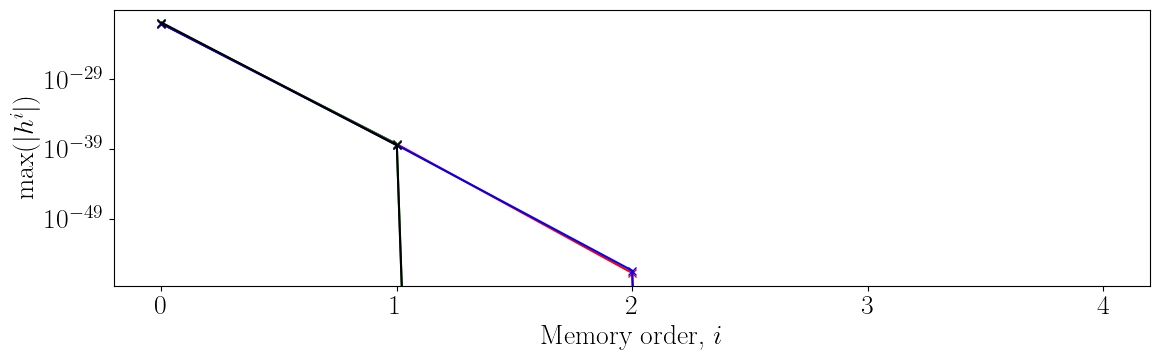

In [7]:
fig = figure(figsize=(12, 4))

qs = [1., 2.]
S1s = [[0., 0., 0.], [0.8, 0., 0.]]
S2s = [[0., 0., 0.], [0., 0.8, 0.]]

colours = ['r', 'b', 'g', 'k']

times = np.linspace(-0.08, 0.02, 10001)

parameters = dict(
    total_mass=60, distance=400, times=times
)

for ii, q in enumerate(qs):
    parameters["q"] = q
    for jj, (S1, S2) in  enumerate(zip(S1s, S2s)):
        parameters["spin_1"] = S1
        parameters["spin_2"] = S2
        
        surr = gwmemory.waveforms.Surrogate(**parameters)
        osc = gwmemory.utils.combine_modes(surr.h_lm, np.pi / 2, 0)
        modes = gwmemory.harmonics.lmax_modes(4)
        old_h_mem = np.array(0 * (1 + 1j))
        delta_h = [max(abs(osc['plus'] - 1j * osc['cross']))]

        for kk in range(1, 5):
            h_mem, times = surr.time_domain_memory(np.pi / 2, 0)
            delta_h.append(h_mem['plus'][-1] - 1j * h_mem['cross'][-1] - old_h_mem)
            old_h_mem = h_mem['plus'][-1] - 1j * h_mem['cross'][-1]
            h_mem_lm, times = surr.time_domain_memory()
            surr = gwmemory.waveforms.Surrogate(**parameters)
            for key in h_mem_lm:
                if key[0] <= 4:
                    surr.h_lm[key] += h_mem_lm[key]
        
        colour = colours[ii + jj * 2]

        semilogy(range(5), np.abs(delta_h), marker='x', label='$q={}$, $S_1={}$, $S_2={}$'.format(q, S1, S2),
                 color=colour)
        xlabel('Memory order, $i$')
        ylabel('$\max(|h^i|)$')
        
xticks(range(5))

ax = plt.gca()
ax.grid(True, axis='y')

tight_layout()
show()
close()

## Other Examples

Below are some additional examples of using the code.

## Compare Waveform models

Compare the memory predicted using the available waveforms.

*FIXME: add references*

/usr/share/miniconda/lib/python3.9/site-packages/gwmemory/waveforms/mwm.py:215: RuntimeWarning: invalid value encountered in power
  rr = rm * (1 - TT / trr) ** (1 / 4)


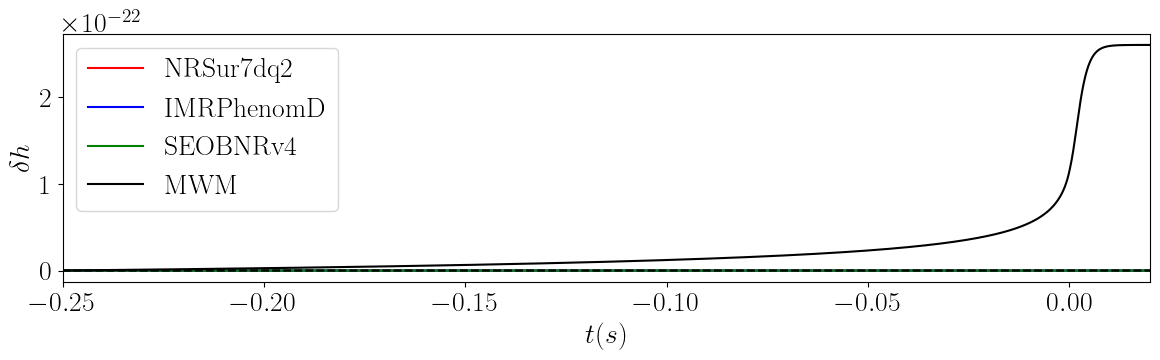

In [8]:
fig = figure(figsize=(12, 4))

q = 1.0
S1 = [0.0, 0.0, 0.0]
S2 = [0.0, 0.0, 0.0]

colours = ['r', 'b', 'g', 'k']

parameters = dict(
    q=1, spin_1=S1, spin_2=S2,
    total_mass=60, distance=400,
    inc=np.pi / 2, phase=0.0
)


for ii, model in enumerate(['NRSur7dq2', 'IMRPhenomD', 'SEOBNRv4', 'MWM']):
    h_mem, times = gwmemory.time_domain_memory(**parameters, model=model)

    plot(times, h_mem['plus'] - h_mem['plus'][np.argmin(abs(times+0.25))],
         linestyle='-', color=colours[ii], label=model)
    plot(times, h_mem['cross'] - h_mem['cross'][np.argmin(abs(times+0.25))],
         linestyle='--', color=colours[ii])
        
xlabel('$t (s)$')
ylabel('$\delta h$')
legend(loc='upper left', fontsize=20)

xlim(-0.25, 0.02)

tight_layout()
show()
close()

## Oscillatory and Memory Waveform

In order to generate the memory we necessarily generate the time-domain oscillatory waveform.

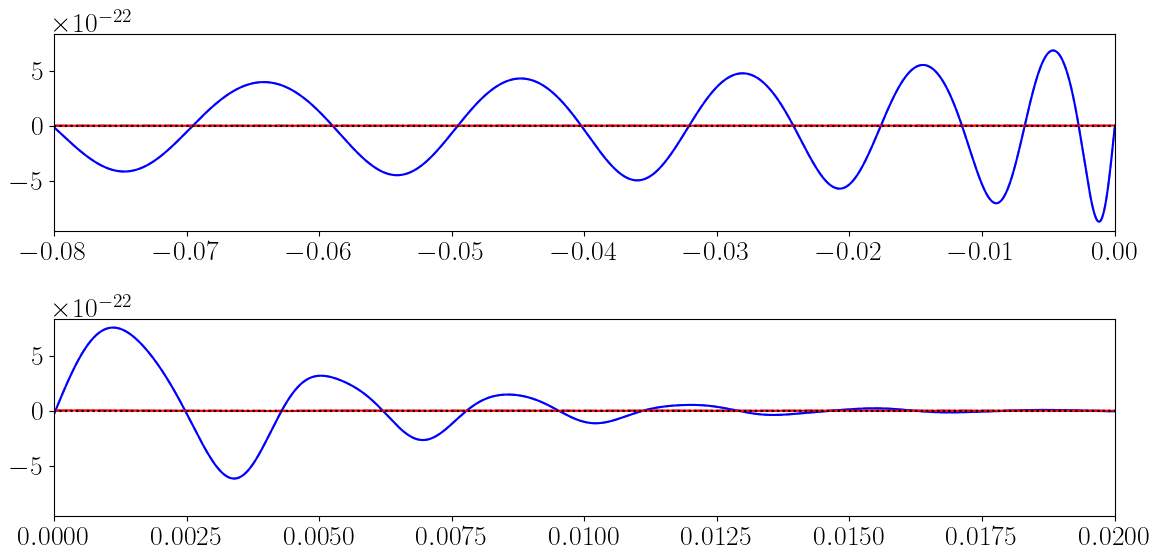

In [9]:
q = 1.
S1 = [0., 0., 0.]
S2 = [0., 0., 0.]

times = np.linspace(-0.08, 0.02, 10001)
surr = gwmemory.waveforms.Surrogate(
    q=q, spin_1=S1, spin_2=S2, total_mass=60, distance=400, times=times
)

inc = np.pi / 2
pol = 0

oscillatory, times = surr.time_domain_oscillatory(inc=inc, phase=pol)
memory, times = surr.time_domain_memory(inc=inc, phase=pol)

fig = figure(figsize=(12, 6))
fig.add_subplot(2, 1, 1)
plt.plot(times, oscillatory['plus'], linestyle='--', color='b', alpha=0.5)
plt.plot(times, oscillatory['cross'], linestyle='--', color='r', alpha=0.5)
plt.plot(times, memory['plus'], linestyle='-.', color='b', alpha=0.5)
plt.plot(times, memory['cross'], linestyle='-.', color='r', alpha=0.5)
plt.plot(times, oscillatory['plus'] + memory['plus'], color='b')
plt.plot(times, oscillatory['cross'] + memory['cross'], color='r')
plt.axhline(0, linestyle=':', color='k')
plt.xlim(-0.08, 0.0)

fig.add_subplot(2, 1, 2)
plt.plot(times, oscillatory['plus'], linestyle='--', color='b', alpha=0.5)
plt.plot(times, oscillatory['cross'], linestyle='--', color='r', alpha=0.5)
plt.plot(times, memory['plus'], linestyle='-.', color='b', alpha=0.5)
plt.plot(times, memory['cross'], linestyle='-.', color='r', alpha=0.5)
plt.plot(times, oscillatory['plus'] + memory['plus'], color='b')
plt.plot(times, oscillatory['cross'] + memory['cross'], color='r')
plt.axhline(0, linestyle=':', color='k')
plt.xlim(-0.0, 0.02)

plt.tight_layout()
plt.show()
plt.close()

## Frequency Domain Memory


For graviational-wave parameter estimation we will require frequency domain waveforms. This is currently implemented by performing a fast fourier transform on the time domain waveform.

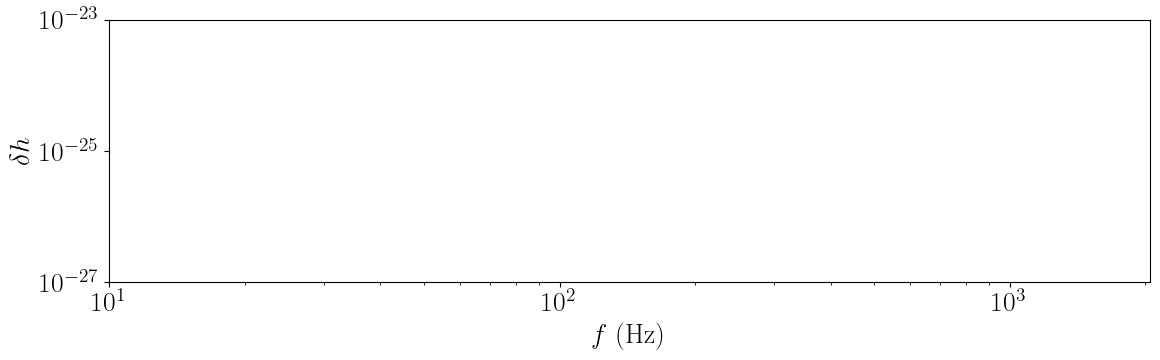

In [10]:
fig = figure(figsize=(12, 4))

q = 1.
S1 = [0, 0.8, 0]
S2 = [0.8, 0, 0]

times = np.linspace(-0.98, 0.02, 10000)

colours = ['r', 'b', 'g', 'k']

h_mem, frequencies = gwmemory.frequency_domain_memory(
    q=q, spin_1=S1, spin_2=S2, total_mass=60., distance=400.,
    model='NRSur7dq2', inc=np.pi/2, phase=0., times=times
)

plt.loglog(frequencies, abs(h_mem['plus']), linestyle='-', color='r', label=model)
plt.loglog(frequencies, abs(h_mem['cross']), linestyle='--', color='r')
    
plt.xlabel('$f$ (Hz)')
plt.ylabel('$\delta h$')

plt.xlim(10, 2048)
plt.ylim(1e-27, 1e-23)

ax = plt.gca()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()
plt.close()